In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

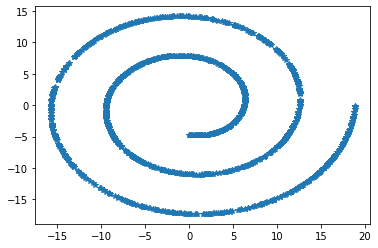

In [33]:
n_samples=1500
np.random.seed(0)

t=1.5*np.pi*(1+3*np.random.rand(1,n_samples))
x=t*np.cos(t)
y=t*np.sin(t)

X=np.concatenate((x,y))
X=X+2*np.random.rand(2,1500)

plt.plot(x.T,y.T,"*")



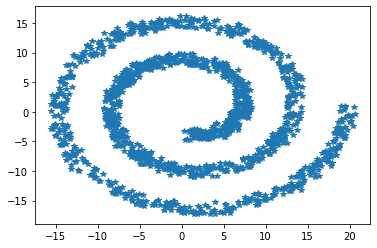

In [34]:
plt.plot(X.T[:,0],X.T[:,1],"*")

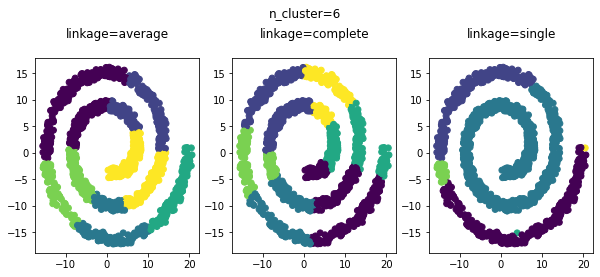

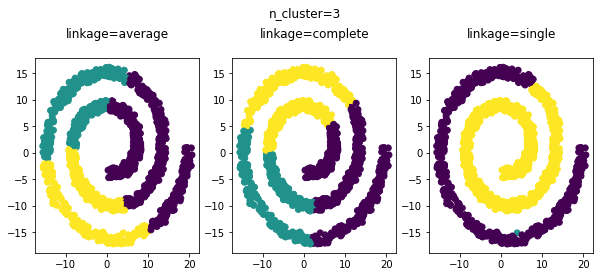

In [37]:
for n_cluster in (6,3):
    plt.figure(figsize=(10,4))

    for index,linkage in enumerate(('average','complete','single')):
        plt.subplot(1,3,index+1)
        model=AgglomerativeClustering(linkage=linkage,n_clusters=n_cluster)
        model.fit(X.T)
        y_pred=model.labels_
        plt.scatter(X.T[:,0],X.T[:,1], c=y_pred)
        plt.title("linkage=%s\n"%(linkage))
        plt.subplots_adjust(top=0.8)
        plt.suptitle("n_cluster=%i"%(n_cluster))
plt.show()


In [54]:
noisy_circles =datasets.make_circles(n_samples=n_samples,noise=0.05,factor=0.5)

noisy_moons=datasets.make_moons(n_samples=n_samples,noise=0.05)

vaired= datasets.make_blobs(random_state=None,n_samples=n_samples,cluster_std=[1,2.5,0.5])

blobs= datasets.make_blobs(random_state=None,n_samples=n_samples)

X,y= datasets.make_blobs(random_state=1780,n_samples=n_samples)
X_aniso=np.dot(X,[[0.6,-0.6],[-0.4,0.8]])
aniso=(X_aniso,y)

no_structure=np.random.rand(n_samples,2),None


<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [55]:
titles=["noisy_circles","noisy_moons","vaired","blobs","aniso","no_structure"]
DataSets=[noisy_circles,noisy_moons,vaired,blobs,aniso,no_structure]

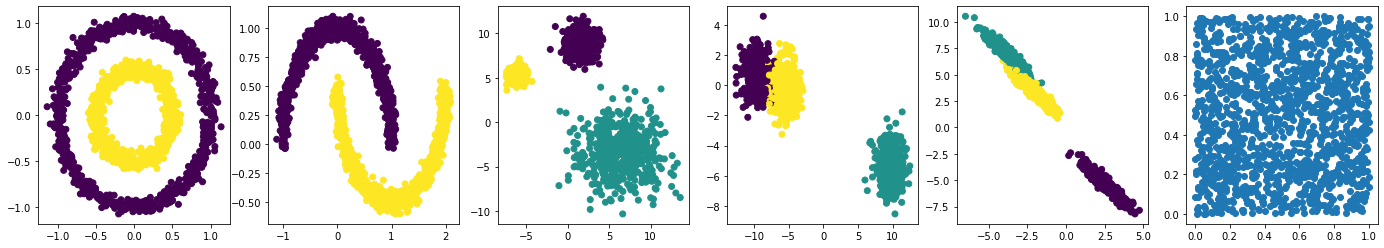

In [56]:
plt.figure(figsize=(24,4))
for index,data in enumerate(DataSets):
    plt.subplot(1,6,index+1)
    plt.scatter(data[0][:,0],data[0][:,1],c=data[1])
plt.show()

In [45]:
aniso

(array([[-4.77318699,  8.19863162],
        [-3.84808369,  6.66084336],
        [ 2.47054382, -4.6852617 ],
        ...,
        [-2.26197142,  4.18997073],
        [-2.90897355,  5.92462514],
        [-3.00114489,  6.01904753]]),
 array([1, 1, 0, ..., 2, 1, 1]))

In [83]:
Datasets=[
    (noisy_circles,{'eps':0.3,'min_samples':5,'n_clusters':2}),
    (noisy_moons,{'eps':0.3,'min_samples':5,'n_clusters':2}),
    (vaired,{'eps':0.3,'min_samples':5,'n_clusters':3}),
    (blobs,{'eps':0.3,'min_samples':5,'n_clusters':3}),
    (aniso,{'eps':0.3,'min_samples':5,'n_clusters':3}),
    (no_structure,{'eps':0.3,'min_samples':5,'n_clusters':4})
]

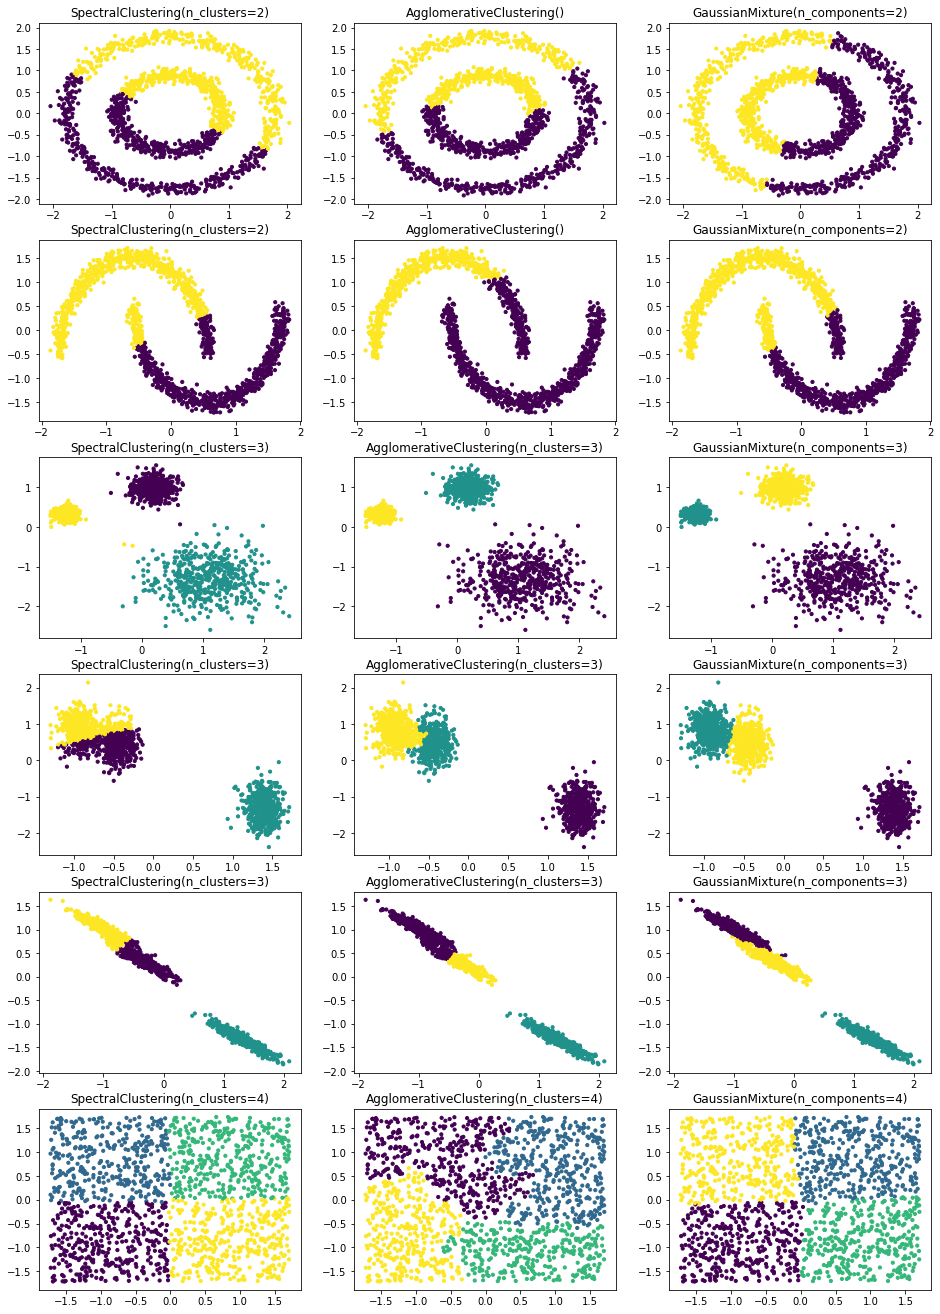

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn import mixture
plt.figure(figsize=(16,64))
number=0
for id,(dataset,params) in enumerate(Datasets):
    X,y=dataset
    X=StandardScaler().fit_transform(X)
    spectral=cluster.SpectralClustering(n_clusters=params['n_clusters'])
    average_linking=cluster.AgglomerativeClustering(n_clusters=params['n_clusters'])
    gmm=mixture.GaussianMixture(n_components=params['n_clusters'])
    
    models=(
        ('SpectralClustering',spectral),
        ('AgglomerativeClustering', average_linking),
        ('GaussianMixture',gmm),
    )

    for name,algorithm in models:
        number=number+1
        algorithm.fit(X)
        if name=='GaussianMixture':
            y_pred=gmm.predict(X)
        else:
            y_pred=algorithm.labels_
        plt.subplot(len(DataSets),len(models),number)
        plt.scatter(X[:,0],X[:,1],c=y_pred,s=10)
        plt.title("%s"%algorithm)
        plt.subplots_adjust(top=0.4)
plt.show()